In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def accel_grav(mass, position):
    N = mass.shape[0]
    accel_grav = np.zeros([N,3])
    for i in range(N-1):
        for j in range(i+1,N):
            displacement = position[j,:]-position[i,:]
            distance_cubed = (displacement[0]**2+displacement[1]**2+displacement[2]**2)**1.5
            displacement = displacement/distance_cubed
            accel_grav[i,:] += mass[j]*displacement
            accel_grav[j,:] -= mass[i]*displacement
    return accel_grav

def first_step(position,velocity,acceleration,dt):
    return position+dt*velocity+0.5*(dt**2)*acceleration

def verlet_step(position,position_old,acceleration,dt):
    return 2.0*position-position_old+(dt**2)*acceleration

def vel(position_old, position_new, dt):
    N = mass.shape[0]
    vel = np.zeros([N,3])
    for i in range(N):
        vel = (position_new - position_old)/dt
    return vel

def ke_func(mass,velocity):
    return((0.5*mass[0]*(((velocity[0,0])**2)+((velocity[0,1])**2)+((velocity[0,2])**2)))+(0.5*mass[1]*(((velocity[1,0])**2)+((velocity[1,1])**2)+((velocity[1,2])**2))))

def pe_func(mass,position,G):
    displacement = position[1,:]-position[0,:]
    distance = (displacement[0]**2+displacement[1]**2+displacement[2]**2)**0.5
    return(-G*mass[0]*mass[1]/distance)

def get_super(x):
    normal = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+-=()"
    super_s = "ᴬᴮᶜᴰᴱᶠᴳᴴᴵᴶᴷᴸᴹᴺᴼᴾQᴿˢᵀᵁⱽᵂˣʸᶻᵃᵇᶜᵈᵉᶠᵍʰᶦʲᵏˡᵐⁿᵒᵖ۹ʳˢᵗᵘᵛʷˣʸᶻ⁰¹²³⁴⁵⁶⁷⁸⁹⁺⁻⁼⁽⁾"
    res = x.maketrans(''.join(normal), ''.join(super_s))
    return x.translate(res)

def get_sub(x):
    normal = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+-=()"
    sub_s = "ₐ₈CDₑբGₕᵢⱼₖₗₘₙₒₚQᵣₛₜᵤᵥwₓᵧZₐ♭꜀ᑯₑբ₉ₕᵢⱼₖₗₘₙₒₚ૧ᵣₛₜᵤᵥwₓᵧ₂₀₁₂₃₄₅₆₇₈₉₊₋₌₍₎"
    res = x.maketrans(''.join(normal), ''.join(sub_s))
    return x.translate(res)

In [3]:
# Define computational units: masses in solar masses, distances in AUs, time in Earth years
G=4.0*np.pi**2

In [4]:
# System of two masses, one with 1.00 solar mass, the other with 0.1 solar mass (roughly 100x mass of Jupiter)
N=2
mass=np.array([1.00,0.1])

# Choose orbital period of 1.0 Earth year
T=1.0-0.5
w=2.0*np.pi/T

# Kepler's 3rd Law to compute semi-major axis
M=np.sum(mass)
a=(G*M/w**2)**(1.0/3.0)

# Initial positions: place two masses on x-axis with center-of-mass at origin
# rows: different masses; columns: x, y, z coordinates
position=np.zeros([N,3])
position[0,:]=np.array([-a*mass[1]/M,0,0])
position[1,:]=np.array([+a*mass[0]/M,0,0])

# Initial velocities: Circular orbits - with initial positions on x-axis, initial velocities in y-direction
# rows: different masses; columns: x, y, z components of velocity
velocity=np.zeros([N,3])
velocity[0,:]=np.array([0,position[0,0],0])*w*1.2
velocity[1,:]=np.array([0,position[1,0],0])*w*1.2

In [5]:
# Step size and number of time steps
dt=T/720.0
tot_time=6.0
num_steps=np.ceil(tot_time/dt).astype(int)
positions=np.zeros([N,3,num_steps+1])
positions[:,:,0]=position
velocitys = np.zeros([N,3,num_steps+1])
velocitys[:,:,0] = velocity

kes = np.zeros([num_steps+1])
pes = np.zeros([num_steps+1])
tes = np.zeros([num_steps+1])
delE = np.zeros([num_steps+1])

In [6]:
# First time step
acceleration=G*accel_grav(mass,position)
position_new=first_step(position,velocity,acceleration,dt)
position_old=position
position=position_new
positions[:,:,1]=position
velocitys[:,:,1] = vel(position_old, position_new, dt)

kes[1] = ke_func(mass,velocity)
pes[1] = pe_func(mass,position,G)
tes[1] = kes[1] + pes[1]
delE[1] = tes[1] - tes[0]

In [7]:
# Loop through time steps 2 through num_steps
for t in range(2,num_steps+1):
    acceleration=G*accel_grav(mass,position)
    position_new=verlet_step(position,position_old,acceleration,dt)
    position_old=position
    position=position_new
    positions[:,:,t]=position
    velocitys[:,:,t] = vel(position_old, position, dt)
    
    kes[t] = ke_func(mass,velocity)
    pes[t] = pe_func(mass,position,G)
    tes[t] = kes[t] + pes[t]
    delE[t] = tes[t] - tes[0]

In [8]:
time = np.arange(num_steps+1)

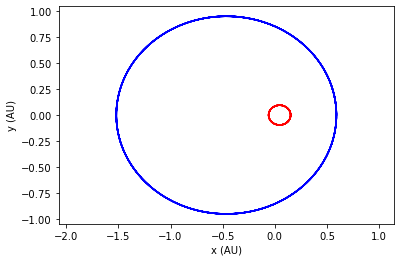

In [9]:
plt.plot(positions[1,0,:],positions[1,1,:],'b-',positions[0,0,:],positions[0,1,:],'r-')
plt.axis('equal');
plt.xlabel('x (AU)');
plt.ylabel('y (AU)');
plt.savefig("3_1(a)_pos")

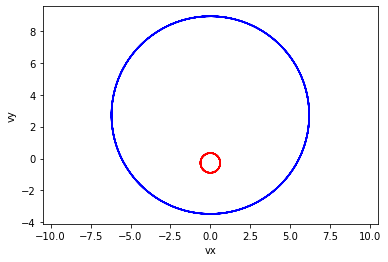

In [10]:
plt.plot(velocitys[1,0,:],velocitys[1,1,:],'b-',velocitys[0,0,:],velocitys[0,1,:],'r-')
plt.axis('equal');
plt.xlabel('vx');
plt.ylabel('vy');

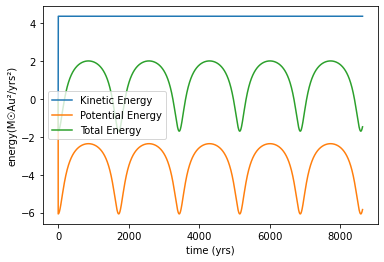

In [11]:
plt.plot(time,kes, label='Kinetic Energy')
plt.plot(time,pes, label='Potential Energy')
plt.plot(time,tes, label='Total Energy')
plt.legend()
plt.xlabel('time (yrs)');
plt.ylabel('energy(M{}Au{}/yrs{})'.format(get_sub('☉'),get_super('2'),get_super('2')));
plt.savefig("3_1(a)_alle")

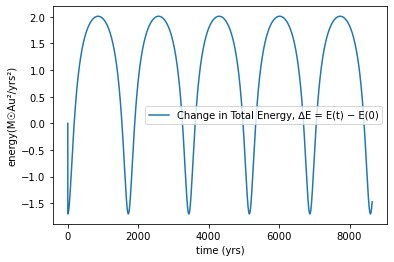

In [13]:
plt.plot(time,delE, label='Change in Total Energy, ∆E = E(t) − E(0)')
plt.legend()
plt.xlabel('time (yrs)');
plt.ylabel('energy(M{}Au{}/yrs{})'.format(get_sub('☉'),get_super('2'),get_super('2')));
plt.savefig("3_1(a)dele")